In [102]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.cluster.vq import whiten, kmeans2
%matplotlib inline


In [103]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'ef6770f808854c2b9576b954e25631a6' }).json()
        return json[result_key]
    except:
        print(json)
        return None


teams = call_api('http://api.football-data.org/v1/competitions/455/teams', 'teams')
for team in teams:
    squadMarketValue = team['squadMarketValue']
    if squadMarketValue == None:
        squadMarketValue = random.randint(100000, 5000000)
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    looses = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            if f['result']['goalsHomeTeam'] and f['result']['goalsAwayTeam']:
                if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam']:                
                    looses += 1
        else:
            if f['result']['goalsHomeTeam'] and f['result']['goalsAwayTeam']:
                if f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam']:
                    looses += 1 if f['result']['goalsHomeTeam'] else 0
    team['squadMarketValue'] = squadMarketValue
    team['looses'] = looses    

team_for_pd = []
for team in teams:
    if team['looses']:
        team_for_pd.append({'name': team['name'], 'squadMarketValue': team['squadMarketValue'], 'looses': team['looses']})
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']

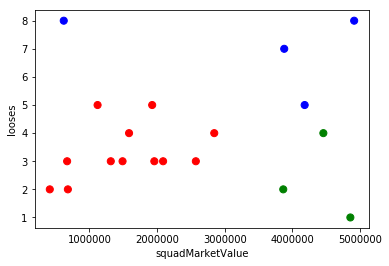

In [104]:
whitened = whiten(teams_pd.as_matrix())
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='squadMarketValue', y='looses', c=colors, s=50)

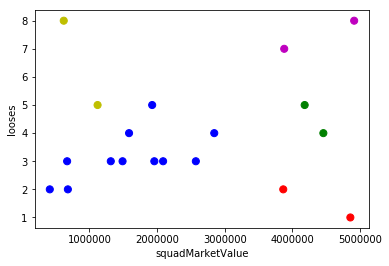

In [112]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='squadMarketValue', y='looses', c=colors, s=50)